In [5]:
import os
import sklearn
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#To make the notebook's output stable across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path for saving images 
IMAGES_PATH = os.path.join("images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Section: Linear SVM Classification

Support Vector Machine (SVM) is a model, capble of performing linear or nonlinear classification, regression and in some cases even outlier detection. This type of model is typically suited for classification of complex small / medium sized datasets

##### Large margin classification

The fundamental idea of SVM can be illustrated by the Figure 5-1, the left is a "bad" model and the right is a SVM model

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #Petal width and petal length
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure SVM - Large margin classification


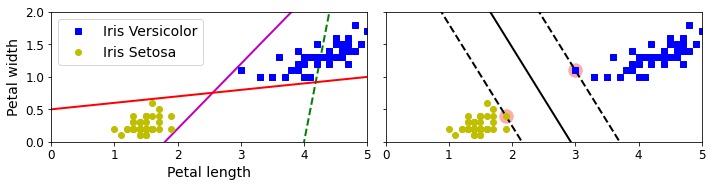

Figure 5-1


In [3]:
#Bad model
x0 = np.linspace(0, 5.5 ,200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    #At the decision boundry, w0*x0 + w1*x1 + b =0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolor="#FFAAAA")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris Versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Iris Setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5, 0 ,2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.axis([0, 5, 0, 2])

save_fig("SVM - Large margin classification")
plt.show()
print("Figure 5-1")

The <strong>left plot</strong> shows the decision boundaries of 3 linear classifiers. The <em>green line </em>(dashed) is so bad that it doesn't even separate the classes properly. The other <em>two models</em> perform very well on this training set, <strong>but</strong> their decision boundaries are so close to the instances. I.e, they won't perform as well with new instances

On the <strong>right plot</strong> we can see that the decision boundary (solid line) of the SVM classifier manages to separate the two classes and stay far away from them. It helps to think of the SVM as fitting the widest possible street (represented by the dashed lines) between the classes. This is called <strong><em>large margin classification</em></strong>

Adding more training instances "off the streets" will not affect the decision boundary: it's full determined (or "supported") by the instances located on the edge of the street. These instances are called <strong><em>support vectors</em></strong> (circled in pink)

##### Sensitivity to feature scale

Figure 5-2 shows how sensitive SVMs are to feature scales. On the <strong>left plot</strong>, the vertical scale (<strong>y axis</strong>) is much larger that the horizontal scale (<strong>x axis</strong>), so the widest possible street is close to the horizontal. <br>
The <strong>right plot</strong> shows how the decision boundary look much better after feature scaling with StandardScaler()

Saving figure SVM - Sensitivity to feature scale


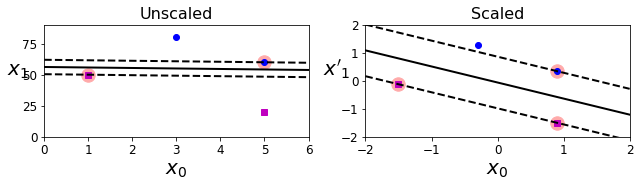

In [8]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1], Xs[:,1][ys==1], "bo")
plt.plot(Xs[:,0][ys==0], Xs[:,1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.title("Unscaled", fontsize=16)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", rotation=0, fontsize=20)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.title("Scaled", fontsize=16)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$", rotation=0, fontsize=20)
plt.axis([-2, 2, -2, 2])

save_fig("SVM - Sensitivity to feature scale")

##### Soft margin classification

If we strictly impose on all the instances to be on the right side, off the street, then this is called <strong><em>hard margin classification</em></strong>. There are two main issues with this type of classification:
<ul>
    <li>First, it only works if the data is linearly separable</li>
    <li>Second, its sensitive to outliers</li>
</ul>

In Figure 5-3 we add to the Iris dataset one additional outlier. On the <strong>left plot</strong>, it's impossible to find a hard margin. While in the <strong>right plot</strong> the decision boundary ends up with a very narrow street, thus it will most likely not generalize as well

Saving figure SVM - Sensitivity to outliers


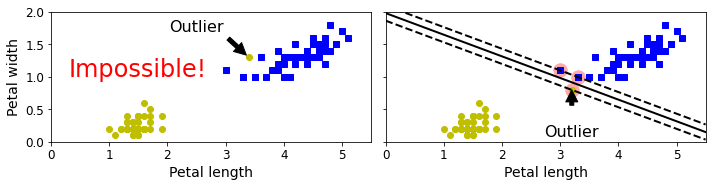

Figure 5-3


In [17]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0 ,"Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=16
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor="black", shrink=0.5),
             fontsize=16
            )
plt.axis([0, 5.5, 0, 2])

save_fig("SVM - Sensitivity to outliers")
plt.show()
print("Figure 5-3")